In [3]:
#Load Libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header =['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url,names=header)

In [5]:
print(dataset.shape)

(150, 5)


In [6]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


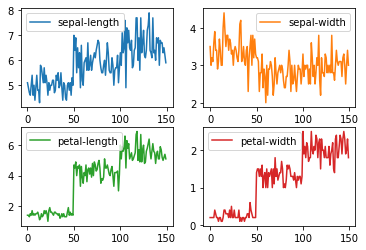

In [9]:
#creating line graph
dataset.plot(kind='line',subplots = True, layout=(2,2), sharex = False, sharey = False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

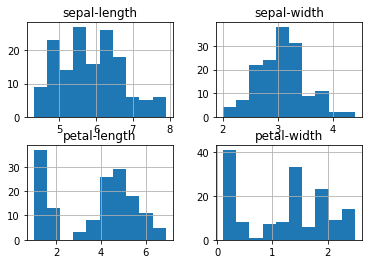

In [29]:
#create histogram
dataset.hist()
plt.show

(array([[ 0.,  0.,  0.,  0.,  0., 11., 48., 49., 31., 11.],
        [ 0.,  0., 11., 97., 38.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 44.,  6.,  1., 10., 34., 30., 20.,  5.,  0.],
        [50., 52., 45.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.88, 1.66, 2.44, 3.22, 4.  , 4.78, 5.56, 6.34, 7.12, 7.9 ]),
 <a list of 4 BarContainer objects>)

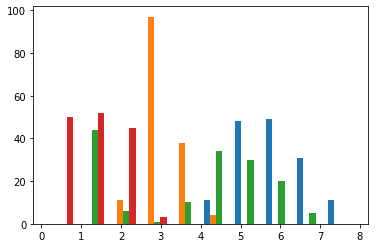

In [30]:
#creating histogram for each columns
plt.hist([dataset['sepal-length'], dataset['sepal-width'], dataset['petal-length'], dataset['petal-width']])

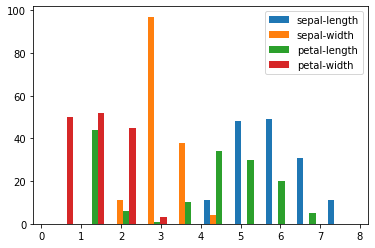

In [50]:
#histogram with legend
plt.hist([dataset['sepal-length'], dataset['sepal-width'], dataset['petal-length'], dataset['petal-width']], label= dataset.columns.values[:-1])
plt.legend()

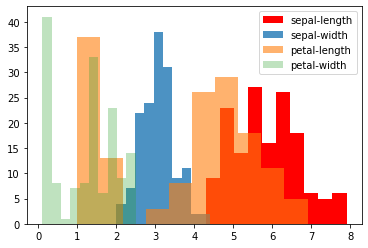

In [58]:
plt.hist(dataset['sepal-length'],alpha=1,color='red', label=dataset.columns.values[0])
plt.hist(dataset['sepal-width'], alpha=0.8, label=dataset.columns.values[1])
plt.hist(dataset['petal-length'], alpha=0.6, label=dataset.columns.values[2])
plt.hist(dataset['petal-width'], alpha=0.3, label=dataset.columns.values[3])
plt.legend()

Text(0.5, 1.0, 'Iris Data Scatter Plot sepal-length vs sepal-width')

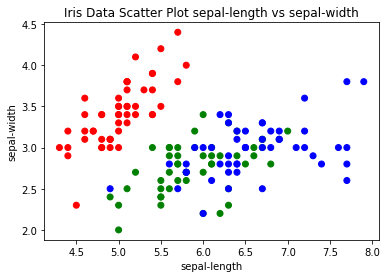

In [68]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(dataset['sepal-length'], dataset['sepal-width'],c=dataset['class'].map(colors))
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('Iris Data Scatter Plot sepal-length vs sepal-width')


Text(0.5, 1.0, 'Iris Data Scatter Plot sepal-length vs petal-length')

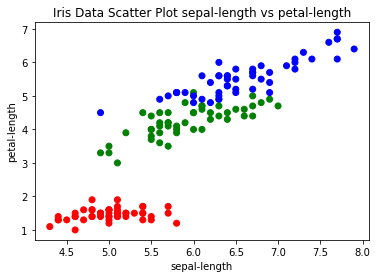

In [69]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(dataset['sepal-length'], dataset['petal-length'],c=dataset['class'].map(colors))
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.title('Iris Data Scatter Plot sepal-length vs petal-length')


Text(0.5, 1.0, 'Iris Data Scatter Plot sepal-length vs petal-width')

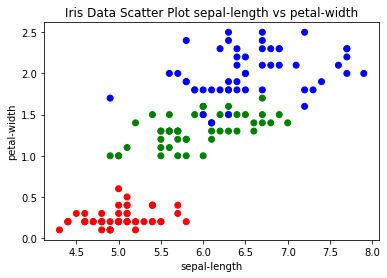

In [70]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(dataset['sepal-length'], dataset['petal-width'],c=dataset['class'].map(colors))
plt.xlabel('sepal-length')
plt.ylabel('petal-width')
plt.title('Iris Data Scatter Plot sepal-length vs petal-width')

In [51]:
#correlation
dataset.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

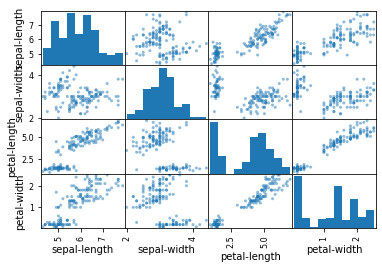

In [11]:
scatter_matrix(dataset)
plt.show

In [12]:
array=dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)
print(X_train, X_test, Y_train, Y_test)

[[4.8 3.0 1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.4 3.9 1.3 0.4]
 [4.3 3.0 1.1 0.1]
 [6.3 2.8 5.1 1.5]
 [6.4 2.8 5.6 2.1]
 [5.6 2.9 3.6 1.3]
 [6.3 2.5 5.0 1.9]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [6.1 2.8 4.0 1.3]
 [5.9 3.0 4.2 1.5]
 [5.1 3.8 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [6.9 3.1 4.9 1.5]
 [5.2 3.5 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [6.5 2.8 4.6 1.5]
 [7.7 2.6 6.9 2.3]
 [7.7 3.8 6.7 2.2]
 [5.6 2.8 4.9 2.0]
 [4.6 3.4 1.4 0.3]
 [6.4 2.7 5.3 1.9]
 [5.7 3.8 1.7 0.3]
 [4.4 3.0 1.3 0.2]
 [5.4 3.4 1.7 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 2.5 5.8 1.8]
 [6.0 2.7 5.1 1.6]
 [5.0 2.0 3.5 1.0]
 [5.7 2.8 4.1 1.3]
 [6.3 3.3 6.0 2.5]
 [5.6 2.7 4.2 1.3]
 [5.6 3.0 4.1 1.3]
 [4.6 3.1 1.5 0.2]
 [5.8 2.7 5.1 1.9]
 [5.8 4.0 1.2 0.2]
 [4.7 3.2 1.6 0.2]
 [5.5 2.5 4.0 1.3]
 [5.4 3.0 4.5 1.5]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.2 2.0]
 [6.7 3.1 4.4 1.4]
 [6.1 2.8 4.7 1.2]
 [6.9 3.1 5.4 2.1]
 [7.2 3.0 5.8 1.6]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.0 1.1]
 [4.9 3.1 1.5 0.1]
 [6.5 3.0 5.

In [13]:
seed = 6
scoring = 'accuracy'


In [14]:
#spot check algorithms

models = []
models.append(('LR',LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [15]:
regressor = LinearDiscriminantAnalysis()
regressor.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [18]:
Y_pred = regressor.predict(X_train)

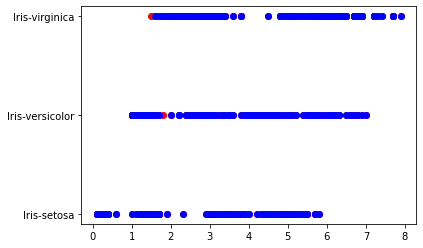

In [86]:
plt.scatter(X_train[:,0],Y_train, color = 'red')
plt.scatter(X_train[:,1],Y_train, color = 'red')
plt.scatter(X_train[:,2],Y_train, color = 'red')
plt.scatter(X_train[:,3],Y_train, color = 'red')
plt.scatter(X_train[:,0],Y_pred, color = 'blue')
plt.scatter(X_train[:,1],Y_pred, color = 'blue')
plt.scatter(X_train[:,2],Y_pred, color = 'blue')
plt.scatter(X_train[:,3],Y_pred, color = 'blue')
plt.show()

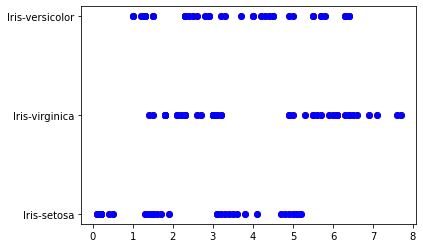

In [90]:
plt.scatter(X_test[:,0],Y_test, color = 'red')
plt.scatter(X_test[:,1],Y_test, color = 'red')
plt.scatter(X_test[:,2],Y_test, color = 'red')
plt.scatter(X_test[:,3],Y_test, color = 'red')
plt.scatter(X_test[:,0],regressor.predict(X_test), color = 'blue')
plt.scatter(X_test[:,1],regressor.predict(X_test), color = 'blue')
plt.scatter(X_test[:,2],regressor.predict(X_test), color = 'blue')
plt.scatter(X_test[:,3],regressor.predict(X_test), color = 'blue')
plt.show()

In [118]:
result={'predicted class': regressor.predict(X_test),
       'real class':Y_test }
result=pandas.DataFrame(data=result)
result


,predicted class,real class
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor
